In [8]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from custom_dataloader import replicate_data, replicate_data_single
import matplotlib.pyplot as plt
from PRF import prf

from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay,accuracy_score,f1_score,classification_report
from sklearn.preprocessing import StandardScaler


# Compare RF and PRF with c2d

In [2]:
CIII = True # Train with Class III as a possible class
# YSO_EG_Stars Train
file_inp = "c2d_w_quality.csv"
input = pd.read_csv(file_inp)
bands = [idx for idx in input.columns.values if (idx[0].lower() == 'm'.lower() or idx[0].lower() == 'e'.lower())]
bands = bands[:-2]
bands.append("alpha")

inp_tr, tar_tr,inp_va, tar_va,inp_te, tar_te = replicate_data(input[bands].values.astype(float), input[['Target']].values.astype(int),[3000]*3,[1000,1650,20000])# 171,133,693,219,1974,2500
# while np.all(np.isfinite(inp_tr)) == False:
    # inp_tr, tar_tr, inp_va, tar_va, inp_te, tar_te = replicate_data(input[bands].values.astype(float), input[['Target']].values.astype(int),[3000]*3,[1000,1650,20000])# 171,133,693,219,1974,2500
# print('Assigned training, validation, and test sets.')

val = pd.read_csv("CC_w_Preds.csv")

# N22 = pd.read_csv('NGC_2264.csv')
# N22.drop(N22[N22.Target==3.].index,inplace=True)

bands = [idx for idx in val.columns.values if (idx[0].lower() == 'm'.lower() or idx[0].lower() == 'e'.lower())]
# bands = bands[:-2]
# bands.append("alpha")
print(bands)
inp_CC = val[bands].values.astype(float)
tar_CC = val[['Preds']].values.astype(int)

inp_tr, tar_tr,inp_te, tar_te,inp_va, tar_va = replicate_data(input[bands].values.astype(float), input[['Target']].values.astype(int),[3000,3000,150000],[1000,1650,200000])# 171,133,693,219,1974,2500
inp_va, tar_va = inp_CC, tar_CC
# N22 = pd.read_csv('SPICY_w_quality.csv')
# print(np.unique(N22['Target'].values.astype(float)))
# inp_va2, tarva2 = replicate_data_single(N22[bands].values.astype(float),N22['Target'].values.astype(float),amounts = [len(np.where(N22[['Target']].values==0)[0]),len(np.where(N22[['Target']].values==1)[0]),len(np.where(N22[['Target']].values==2)[0])])

['mag_J', 'e_mag_J', 'mag_H', 'e_mag_H', 'mag_Ks', 'e_mag_Ks', 'mag_IR1', 'e_mag_IR1', 'mag_IR2', 'e_mag_IR2', 'mag_IR3', 'e_mag_IR3', 'mag_IR4', 'e_mag_IR4']


In [3]:
# scale = StandardScaler()
# inp_tr = scale.fit_transform(inp_tr)
# inp_va = scale.transform(inp_va)
# inp_te = scale.transform(inp_te)

In [4]:
rf = RandomForestClassifier()

rf.fit(inp_tr,tar_tr.ravel())

pred_tr = rf.predict(inp_tr)
pred_va = rf.predict(inp_va)
# pred_va2 = rf.predict(inp_va2)


/Users/breannacrompvoets/miniforge3/envs/SF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       1.00      1.00      1.00      3000
           2       1.00      1.00      1.00    150000

    accuracy                           1.00    156000
   macro avg       1.00      1.00      1.00    156000
weighted avg       1.00      1.00      1.00    156000



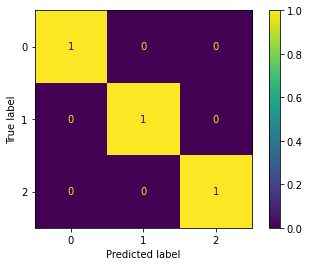

In [5]:
plot_confusion_matrix(rf,inp_tr,tar_tr,normalize='true')
print(classification_report(tar_tr,rf.predict(inp_tr)))

/Users/breannacrompvoets/miniforge3/envs/SF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


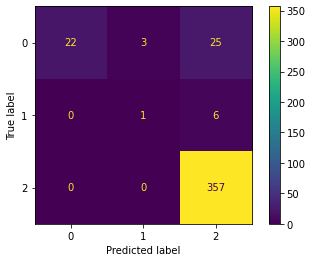

In [6]:
plot_confusion_matrix(rf,inp_va,tar_va)#,normalize='true'

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       958
           1       0.91      0.93      0.92      1649
           2       1.00      1.00      1.00    199999

    accuracy                           1.00    202606
   macro avg       0.93      0.97      0.95    202606
weighted avg       1.00      1.00      1.00    202606



/Users/breannacrompvoets/miniforge3/envs/SF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


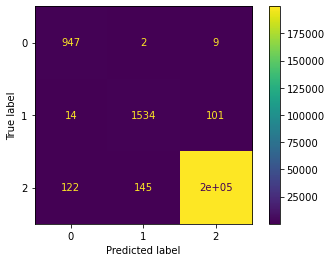

In [7]:
print(classification_report(tar_te, rf.predict(inp_te)))
plot_confusion_matrix(rf,inp_te,tar_te)

## PRF

In [17]:
val = pd.read_csv("CC_w_Preds.csv")
bands = [idx for idx in val.columns.values if (idx[0].lower() == 'm'.lower() or idx[0].lower() == 'e'.lower())]

bands.append("alpha")
print(bands)
# print(f"YSO shape: {input[input['Target']==0].shape}")
# print(f"EG shape: {input[input['Target']==1].shape}")
# print(f"Star shape: {input[input['Target']==2].shape}")


# input['Target']=preproc_yso(input[['alpha']].values,input[['Target']].values,CIII)

# inp_CC, tar_CC = replicate_data_single(val[bands].values.astype(float), val[['Preds']].values.astype(int),[val[val['Preds']==0].shape[0],val[val['Preds']==1].shape[0],val[val['Preds']==2].shape[0]])# 171,133,693,219,1974,2500
inp_CC = val[bands].values.astype(float)
tar_CC = val[['Preds']].values.astype(int)

In [61]:
# X_train = inp_tr[:,(0,2,4,6)]
# dX_train = inp_tr[:,(1,3,5,7)]
# y_train = tar_tr
# X_val = inp_va[:,(0,2,4,6)]
# dX_val = inp_va[:,(1,3,5,7)]
# y_val = tar_va
# X_test = inp_va[:,(0,2,4,6)]
# dX_test = inp_va[:,(1,3,5,7)]
# y_test = tar_va

X_train = inp_tr[:,(0,2,4,6,8,10,12)]
dX_train = inp_tr[:,(1,3,5,7,9,11,13)]
y_train = tar_tr

X_val = inp_CC[:,(0,2,4,6,8,10,12)]
dX_val = inp_CC[:,(1,3,5,7,9,11,13)]
y_val = tar_CC

X_test = inp_te[:,(0,2,4,6,8,10,12)]
dX_test = inp_te[:,(1,3,5,7,9,11,13)]
y_test = tar_te




In [62]:

prf_cls = prf(n_estimators=100, bootstrap=True, keep_proba=0.05)
prf_cls.fit(X=X_train, dX=dX_train, y=y_train)

ProbabilisticRandomForestClassifier(n_estimators_='100', criterion='gini', max_features='auto', max_depth='None', keep_proba='0.05', bootstrap='True', min_py_sum_leaf='1', n_features_='7', feature_importances_='[0.04457968 0.05356429 0.04641696 0.05502917 0.10287436 0.17573063
 0.29397034]', max_features_num='2', unsupervised='False', n_classes_='3')

In [63]:

pred_tr = prf_cls.predict(X=X_train, dX=dX_train)
pred_te = prf_cls.predict(X=X_test, dX=dX_test)

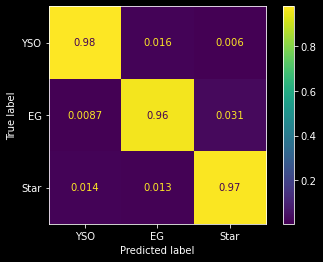

In [64]:
ConfusionMatrixDisplay.from_predictions(tar_tr,pred_tr,normalize='true',display_labels=['YSO','EG','Star'])

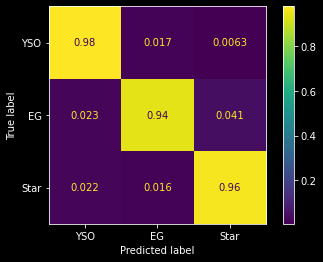

In [65]:
ConfusionMatrixDisplay.from_predictions(tar_te,pred_te,normalize='true',display_labels=['YSO','EG','Star'])

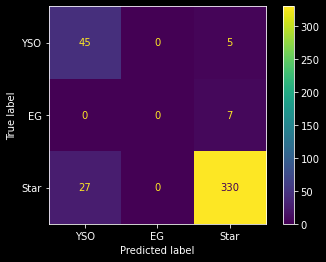

In [66]:

pred_va = prf_cls.predict(X=X_val, dX=dX_val)
ConfusionMatrixDisplay.from_predictions(y_val,pred_va,display_labels=['YSO','EG','Star'])

In [67]:
val.head()
val['RF_Preds'] = pred_va


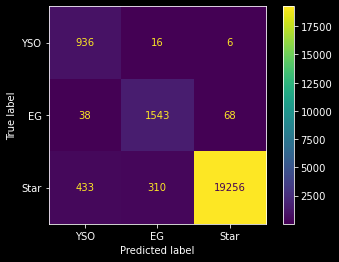

In [68]:
ConfusionMatrixDisplay.from_predictions(tar_te,pred_te,display_labels=['YSO','EG','Star'])

In [69]:
val.to_csv('CC_w_Preds_RF.csv')

# JWST Classification

In [371]:
webb_inp = pd.read_csv('../../NGC_3324/CC_JWST_NIRCAM_MIRI_Full_Dec52022_2pt_vegamag_flux.csv')
all_inp = pd.read_csv('CC_Webb_NIRCam_MIRI_Spitz_2m_w_SPICY_Preds_Dec52022.csv')
print(len(all_inp))

all_inp.columns


427


Index(['Unnamed: 0.1', 'Unnamed: 0', 'RA', 'DEC', 'size',
       'isophotal_vegamag_f090w', 'isophotal_vegamag_err_f090w',
       'aper30_vegamag_f090w', 'aper30_vegamag_err_f090w',
       'aper50_vegamag_f090w',
       ...
       'e_mag_IR2', 'mag_IR3', 'e_mag_IR3', 'mag_IR4', 'e_mag_IR4', 'alpha',
       'Preds', 'SPICY', 'SPICY_Class', 'SPICY_Class_0/1'],
      dtype='object', length=226)

In [372]:
# # Fill NANs

# # NIRCAM
# bands_NIRCam = [idx for idx in bands][:12] # if idx[-8]!='r'

# for i, band in enumerate(bands_NIRCam):
#     if i%2==0:
#         print(band)
#         print(i)
#         min_mag = np.nanmax(webb_inp[[band]])
#         print(min_mag+5)
#         webb_inp[band].fillna(min_mag+5,inplace=True)
#         all_inp[band].fillna(min_mag+5,inplace=True)
#     else:
#         webb_inp[band].fillna(0.5,inplace=True)
#         all_inp[band].fillna(0.5,inplace=True)


# # MIRI

# bands_MIRI = [idx for idx in bands if idx[-8]!='r'][7:]
# bands_MIRI

# MIRI_ind = webb_inp[~webb_inp[bands_MIRI].isna().all(axis=1)][bands_MIRI]
# MIRI_ind
# # plt.hist(MIRI_ind)
# for band in bands_MIRI:
#     print(band)
#     min_mag = np.nanmax(webb_inp[[band]])
#     print(min_mag+5)
#     MIRI_ind.fillna(min_mag+5,inplace=True)
#     all_inp.loc[all_inp[~all_inp[bands_MIRI].isna().all(axis=1)].index,band].fillna(min_mag+5,inplace=True)

# webb_inp.loc[MIRI_ind.index,bands_MIRI] = MIRI_ind

In [373]:
# inp_CC, tar_CC = replicate_data_single(,tar_webb,amounts=[len(tar_webb[tar_webb==0]),len(tar_webb[tar_webb==0])*2])



In [374]:
# from sklearn.decomposition import PCA

# pca = PCA()
# input_test = pca.fit_transform(webb_inp[bands[:-8]].to_numpy())
# input_train = pca.transform(all_inp[bands[:-8]].to_numpy())
# # inp_te = scale.transform(inp_te)

In [375]:
cont = True
amounts_te = []
# 090, 187, 200, 335, 444, 470, 770, 1130, 1280, 1800
inds = (0,4,6,8,12,14,16,18)

bands = [idx for idx in webb_inp.columns.values if (idx[:3].lower() == 'iso'.lower() and idx[10]=='v')]
print(np.array(bands)[np.array(inds)])

input_webb = all_inp[bands].to_numpy()
tar_webb = all_inp[['SPICY_Class_0/1']].to_numpy()
tar_webb[tar_webb==2] = 1

# Choose whether to use RF preds or Preds from SPY-finder
# bands_IR = [idx for idx in all_inp.columns.values if ((idx[:3] == 'mag') or (idx[:5] == 'e_mag'))]
# pred_CC = rf.predict(all_inp[bands_IR].to_numpy())
# pred_CC[pred_CC==2] = 1
pred_CC = tar_webb
def get_best_prf(inds):
    max_f1 = 0.3
    f1scores = []
    for i in np.arange(0,1000,2):
        inp_tr, tar_tr = replicate_data_single(input_webb[:,inds],pred_CC,amounts=[len(pred_CC[pred_CC==0]),len(pred_CC[pred_CC==0])*3],seed=i)
        # webb_inp_tar = np.random.randint(low = 0,high=2,size=webb_inp.shape[0])
        inp_te = webb_inp[np.r_[['RA','DEC','size'],np.array(bands)[np.array(inds)]]].to_numpy()#, tar_te = replicate_data_single(webb_inp[np.r_[['RA','DEC','size'],np.array(bands)[np.array(inds)]]].to_numpy(),webb_inp_tar,amounts=[len(webb_inp_tar[webb_inp_tar==0]),len(webb_inp_tar[webb_inp_tar==1])],seed=i)
        inp_te_radec = inp_te[:,:3]
        inp_te = inp_te[:,3:]


        inp_va, tar_va = replicate_data_single(input_webb[:,inds],pred_CC,amounts=[len(pred_CC[pred_CC==0]),len(pred_CC[pred_CC==1])],seed=i)


        prf_cls = prf(n_estimators=100, bootstrap=False, keep_proba=0.75)
        prf_cls.fit(X=inp_tr, dX=np.array([[0.1]*(int(len(inds)))]*len(tar_tr)), y=tar_tr)

        pred_va = prf_cls.predict(X=inp_va,dX=np.array([[0.1]*(int(len(inds)))]*len(tar_va)))
        f1scores.append(f1_score(tar_va,pred_va,pos_label=0))

        # pred_te = prf_cls.predict(X=inp_te, dX=np.array([[0.1]*(int(len(inds)))]*len(tar_te)))
        # amounts_te.append(len(pred_te[pred_te==0]))

        if (f1_score(tar_va,pred_va,average=None)[0] > max_f1):
            max_prf = prf_cls
            max_f1 = f1_score(tar_va,pred_va,average=None)[0]

            pred_tr = prf_cls.predict(X=inp_tr, dX=np.array([[0.1]*(int(len(inds)))]*len(tar_tr)))
            tar_tr_max, pred_tr_max = tar_tr, pred_tr
            # inp_tr_max, tar_tr_max, pred_tr_max = inp_tr, tar_tr, pred_tr

            # inp_va_max, tar_va_max, pred_va_max = inp_va, tar_va, pred_va

            inp_te_radec_max = inp_te_radec
            inp_te_max = inp_te
            # print(max_f1)
    # print(max_prf.feature_importances_)
    return max_prf, pred_tr_max, tar_tr_max, inp_te_max, tar_te_max, inp_te_radec_max, f1scores, max_f1



[0.0100231  0.03708543 0.02706746 0.03217789 0.05108016 0.00225294
 0.00436042 0.00292371 0.00066431]
All bands present & & 81.8 & 4082 \\ 
All bands present & TR & 97.5 & 27 \\ 
[0.01840531 0.04377105 0.02181985 0.02855559 0.05627804 0.00067904
 0.00233924 0.00207699 0.00062275]
All bands present & & 81.2 & 1552 \\ 
All bands present & TR & 97.0 & 26 \\ 
[0.01615966 0.04585952 0.02476123 0.02674677 0.05835296 0.00030265
 0.00199104 0.00273255 0.00065205]
All bands present & & 82.5 & 1550 \\ 
All bands present & TR & 97.0 & 26 \\ 
[0.01708188 0.03891978 0.02711988 0.03083394 0.0593193  0.00103008
 0.0008173  0.00072138 0.00098211]
All bands present & & 81.2 & 60 \\ 
All bands present & TR & 97.0 & 26 \\ 


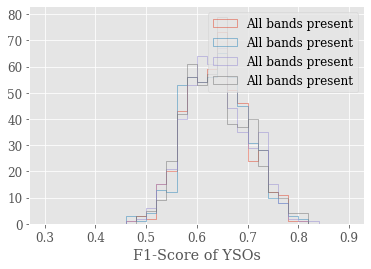

In [122]:
# all_inds = [[0, 2, 4, 6, 8, 10, 12, 14, 16, 18],[2, 4, 6, 8, 10, 12, 14, 16, 18],[0, 4, 6, 8, 10, 12, 14, 16, 18],\
#     [0, 2, 6, 8, 10, 12, 14, 16, 18],[0, 2, 4, 8, 10, 12, 14, 16, 18],[0, 2, 4, 6, 10, 12, 14, 16, 18],[0, 2, 4, 6, 8, 12, 14, 16, 18],\
#         [0, 2, 4, 6, 8, 10, 14, 16, 18],[0, 2, 4, 6, 8, 10, 12, 16, 18],[0, 2, 4, 6, 8, 10, 12, 14, 18],[0, 2, 4, 6, 8, 10, 12, 14, 16],\
#             [0, 4, 6, 8, 12, 14, 16, 18],[0, 2, 4, 6, 8, 10]]
all_inds = [[0, 2, 6, 8, 10, 12, 14, 16, 18]]
arr_rem = ['All bands present', 'F090W', 'F187N', 'F200W', 'F335M', 'F444W', 'F470N', 'F770W', 'F1130W', 'F1280W', 'F1800W',\
    'N bands removed', 'MIRI bands removed']

for i, ind in enumerate(all_inds):
    pred_te_max = np.zeros(600)
    while len(pred_te_max[pred_te_max==0]) > 500:
        max_prf, pred_tr_max, tar_tr_max, inp_te_max, tar_te_max, inp_te_radec_max, f1scores, max_f1 = get_best_prf(ind)
        pred_te_max = max_prf.predict(X=inp_te_max, dX=np.array([[0.1]*(int(len(ind)))]*len(tar_te_max)))
        print(arr_rem[i],'& &',round(max_f1*100,1),'&', len(pred_te_max[pred_te_max==0]),'\\\ ')
        print(arr_rem[i],'& TR &',round(f1_score(tar_tr_max,pred_tr_max)*100,1),'&', len(pred_tr_max[pred_tr_max==0]),'\\\ ')
        plt.hist(f1scores,bins=np.arange(0.3,0.9,0.02),histtype='step',label=arr_rem[i])

plt.xlabel('F1-Score of YSOs')
plt.legend()

In [143]:
num_yso = []
f1_scores = []
pred_tes = [np.nan]*len(pred_te_max)

all_inds = [[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]]

for i in np.arange(0,100):
    max_prf, pred_tr_max, tar_tr_max, inp_te_max, tar_te_max, inp_te_radec_max, f1scores, max_f1 = get_best_prf(ind)
    f1_scores.append(max_f1)
    pred_te_max = max_prf.predict(X=inp_te_max, dX=np.array([[0.1]*(int(len(ind)))]*len(tar_te_max)))
    num_yso.append(len(pred_te_max[pred_te_max==0]))
    pred_tes = np.c_[pred_tes,pred_te_max]



In [376]:
# To determine classification, use mean of each row to determine probability of that object being a star. 
# If the probability to be a star is less than 50%, then the object is a YSO with probability 1-mean
# Make two columns: final class, and probability of being that class

# r = np.c_[pred_te_max,[0]*len(pred_te_max),[1]*len(pred_te_max)] # Reminder of how np.c_ works
p_star = np.nanmean(pred_tes,axis=1)
preds = np.zeros(len(p_star))
preds[p_star>0.5] = 1
p_yso = 1-p_star

preds

len(preds[preds==0])

71

In [377]:
# Make and save predictions/probabilities in csv
CC_Webb_Classified = pd.DataFrame()

CC_Webb_Classified['RA'] = inp_te_radec_max.transpose()[0]
CC_Webb_Classified['DEC'] = inp_te_radec_max.transpose()[1]
CC_Webb_Classified['size'] = inp_te_radec_max.transpose()[2]
CC_Webb_Classified[np.array(bands)[np.array(ind)]] = inp_te_max
CC_Webb_Classified['Class'] = preds
CC_Webb_Classified['Prob YSO'] = p_yso


In [378]:
# Put NANs back into all_inp

spitzer_bands = [idx for idx in s2_matches.columns.values if (idx[:3].lower() == 'mag' or idx[:5].lower() == 'e_mag')]

for i, s in enumerate(spitzer_bands):
    if i%2 == 0:
        s_ind = all_inp[all_inp[s] == max(all_inp[s].values)].index
        all_inp[s].iloc[s_ind] = np.nan
    else:
        # s_ind = all_inp[all_inp[s] == max(all_inp[s].values)]
        all_inp[s].iloc[s_ind] = np.nan


all_inp 

/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_94192/2185005680.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_inp[s].iloc[s_ind] = np.nan
/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_94192/2185005680.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_inp[s].iloc[s_ind] = np.nan


Unnamed: 0.1  Unnamed: 0          RA        DEC      size  \
0               0           0  159.224469 -58.607976  0.001592   
1               1           1  159.266481 -58.580423  0.000903   
2               2           2  159.248036 -58.636096  0.000430   
3               3           3  159.178660 -58.561870  0.001339   
4               4           4  159.250727 -58.592613  0.000799   
..            ...         ...         ...        ...       ...   
422           422         422  159.258776 -58.580942  0.000045   
423           423         423  159.250115 -58.596051  0.000072   
424           424         424  159.261224 -58.612180  0.000069   
425           425         425  159.173353 -58.631281  0.000036   
426           426         426  159.192074 -58.621930  0.000029   

     isophotal_vegamag_f090w  isophotal_vegamag_err_f090w  \
0                        NaN                          NaN   
1                  13.018948                     9.499820   
2                  10.044549                     8.094974   
3                  10.788224                     8.623969   
4                  12.768613                     8.807995   
..                       ...                          ...   
422                      NaN                          NaN   
423                      NaN                          NaN   
424                      NaN                          NaN   
425                      NaN                          NaN   
426                      NaN                          NaN   

     aper30_vegamag_f090w  aper30_vegamag_err_f090w  aper50_vegamag_f090w  \
0                     NaN                       NaN                   NaN   
1               26.101178                 16.808694             25.728937   
2               29.517682                 19.352344             28.189150   
3               18.994490                 13.663846             17.438456   
4               26.707967                 16.277158             25.058784   
..                    ...                       ...                   ...   
422                   NaN                       NaN                   NaN   
423                   NaN                       NaN                   NaN   
424                   NaN                       NaN                   NaN   
425                   NaN                       NaN                   NaN   
426                   NaN                       NaN                   NaN   

     ...  e_mag_IR2  mag_IR3  e_mag_IR3  mag_IR4  e_mag_IR4     alpha  Preds  \
0    ...      0.178    8.040      0.101    6.691      0.106   0.15496    0.0   
1    ...      0.049    6.399      0.033    5.622      0.024  -0.76836    0.0   
2    ...      0.044    7.347      0.033    7.241      0.024  -2.22468    0.0   
3    ...      0.054    7.715      0.037    7.602      0.030  -2.50840    0.0   
4    ...      0.042    7.082      0.033    5.858      0.025   0.55512    0.0   
..   ...        ...      ...        ...      ...        ...       ...    ...   
422  ...      0.099   12.034      0.148      NaN        NaN -12.42712    2.0   
423  ...      0.116      NaN        NaN      NaN        NaN -11.65304    2.0   
424  ...      0.097   12.045      0.129   11.612      0.086  -1.42764    0.0   
425  ...      0.093   11.387      0.113   11.441      0.295  -1.75236    0.0   
426  ...      0.088   11.770      0.174      NaN        NaN -13.24220    2.0   

      SPICY  SPICY_Class  SPICY_Class_0/1  
0    7440.0    FS                     0.0  
1       NaN          NaN              1.0  
2       NaN          NaN              1.0  
3       NaN          NaN              1.0  
4    7461.0    FS                     0.0  
..      ...          ...              ...  
422     NaN          NaN              1.0  
423     NaN          NaN              1.0  
424     NaN          NaN              1.0  
425     NaN          NaN              1.0  
426     NaN          NaN              1.0  

[427 rows x 226 columns]

In [379]:
from astropy.coordinates import match_coordinates_sky,SkyCoord
import astropy.units as u
# ADD SPICY PREDS
j_sky = SkyCoord(CC_Webb_Classified.RA*u.deg,CC_Webb_Classified.DEC*u.deg)
sp_sky = SkyCoord(all_inp.RA*u.deg, all_inp.DEC*u.deg)

idx, sep2d, _ = match_coordinates_sky(j_sky, sp_sky, nthneighbor=1, storekdtree='kdtree_sky')
sep_constraint = sep2d < np.array(CC_Webb_Classified['size']*3)*u.deg

print(np.count_nonzero(sep_constraint))

j_matches = CC_Webb_Classified[sep_constraint]
s2_matches = all_inp.iloc[idx[sep_constraint]]

j_matches.reset_index(inplace=True)
s2_matches.reset_index(drop=True,inplace=True)



spitzer_bands = [idx for idx in s2_matches.columns.values if (idx[:3].lower() == 'mag' or idx[:5].lower() == 'e_mag')]
spitzer_bands.append('SPICY_Class_0/1')

jwst_spitz_spicy_cat = pd.concat([j_matches,s2_matches[spitzer_bands]],axis=1)
# print(jwst_spitz_spicy_cat)
spicy_df_to_add = pd.DataFrame(data=jwst_spitz_spicy_cat[spitzer_bands].values,columns=spitzer_bands,index=jwst_spitz_spicy_cat['index'])


# jwst_spitz_spicy_cat = pd.concat([j_matches,s2_matches[['SPICY_Class_0/1']]],axis=1)

# spicy_df_to_add = pd.DataFrame(data={'SPICY_Class_0/1':jwst_spitz_spicy_cat['SPICY_Class_0/1'].values},index=jwst_spitz_spicy_cat['index'])
CC_Webb_Classified = pd.concat([CC_Webb_Classified,spicy_df_to_add],axis=1)


CC_Webb_Classified.to_csv('CC_Webb_Predictions_Prob.csv')

443


Mean number of YSOs: 556.11 Median number of YSOs: 79.5
Mean F1-Score: 0.8243617409760228 Median F1-Score: 0.823529411764706
Percent of number of objects above 100: 29


Text(0, 0.5, 'F1-Score of YSOs')

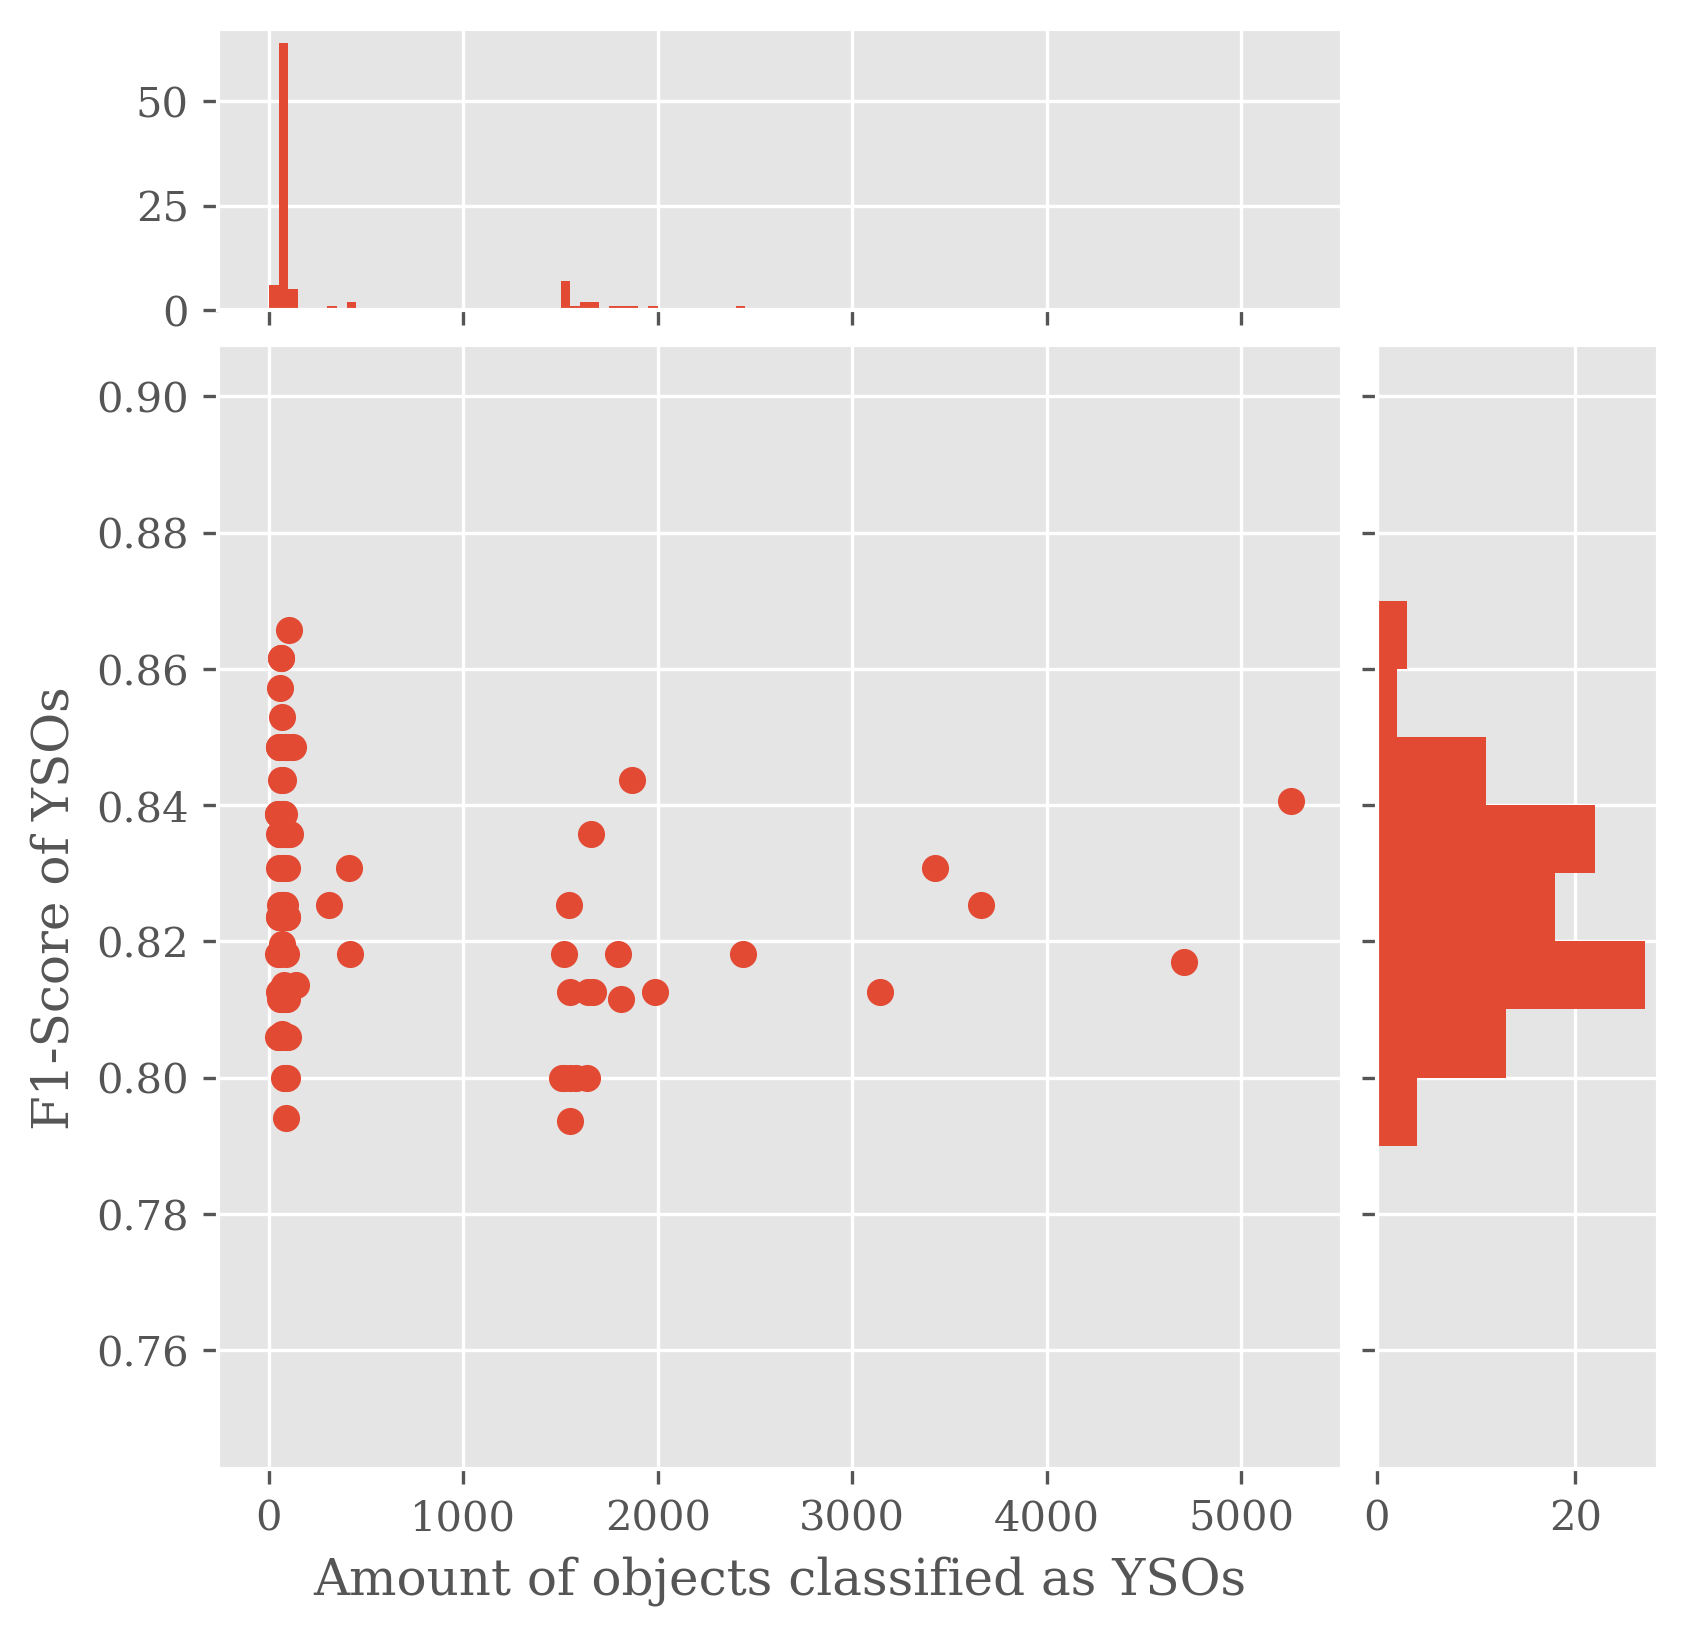

In [380]:
# Scatter plot with hists
print('Mean number of YSOs:',np.mean(num_yso), 'Median number of YSOs:', np.median(num_yso))
print('Mean F1-Score:',np.mean(f1_scores), 'Median F1-Score:', np.median(f1_scores))
print("Percent of number of objects above 100:",len(np.array(num_yso)[np.array(num_yso)>100]))
fig = plt.figure(figsize=(6, 6),dpi=300)
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
# scatter_hist(amounts_te, f1scores, ax, ax_histx, ax_histy)

ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histx.hist(num_yso,bins=np.arange(0,3000,50))#
ax_histy.hist(f1_scores,bins=np.arange(0.75,0.9,0.01), orientation='horizontal')
ax.scatter(num_yso,f1_scores)
ax.set_xlabel('Amount of objects classified as YSOs')
ax.set_ylabel('F1-Score of YSOs')
# ax.set_xscale('log')

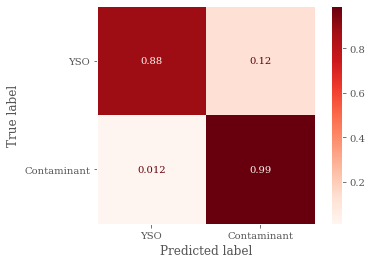

In [381]:
tar_va = CC_Webb_Classified.dropna(subset='SPICY_Class_0/1')[['SPICY_Class_0/1']].values
pred_va = CC_Webb_Classified.dropna(subset='SPICY_Class_0/1')[['Class']].values
ConfusionMatrixDisplay.from_predictions(tar_va,pred_va,cmap='Reds',display_labels=['YSO', 'Contaminant'],normalize='true')
plt.grid(False)
plt.savefig('CM_va_PRF_SPICY_Dec82022.png',dpi=300,facecolor=fig.get_facecolor())

Set DATE-AVG to '2022-06-03T12:45:26.346' from MJD-AVG.
Set DATE-END to '2022-06-03T15:22:38.772' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -31.574327 from OBSGEO-[XYZ].
Set OBSGEO-H to 1654444171.915 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_94192/2340446085.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


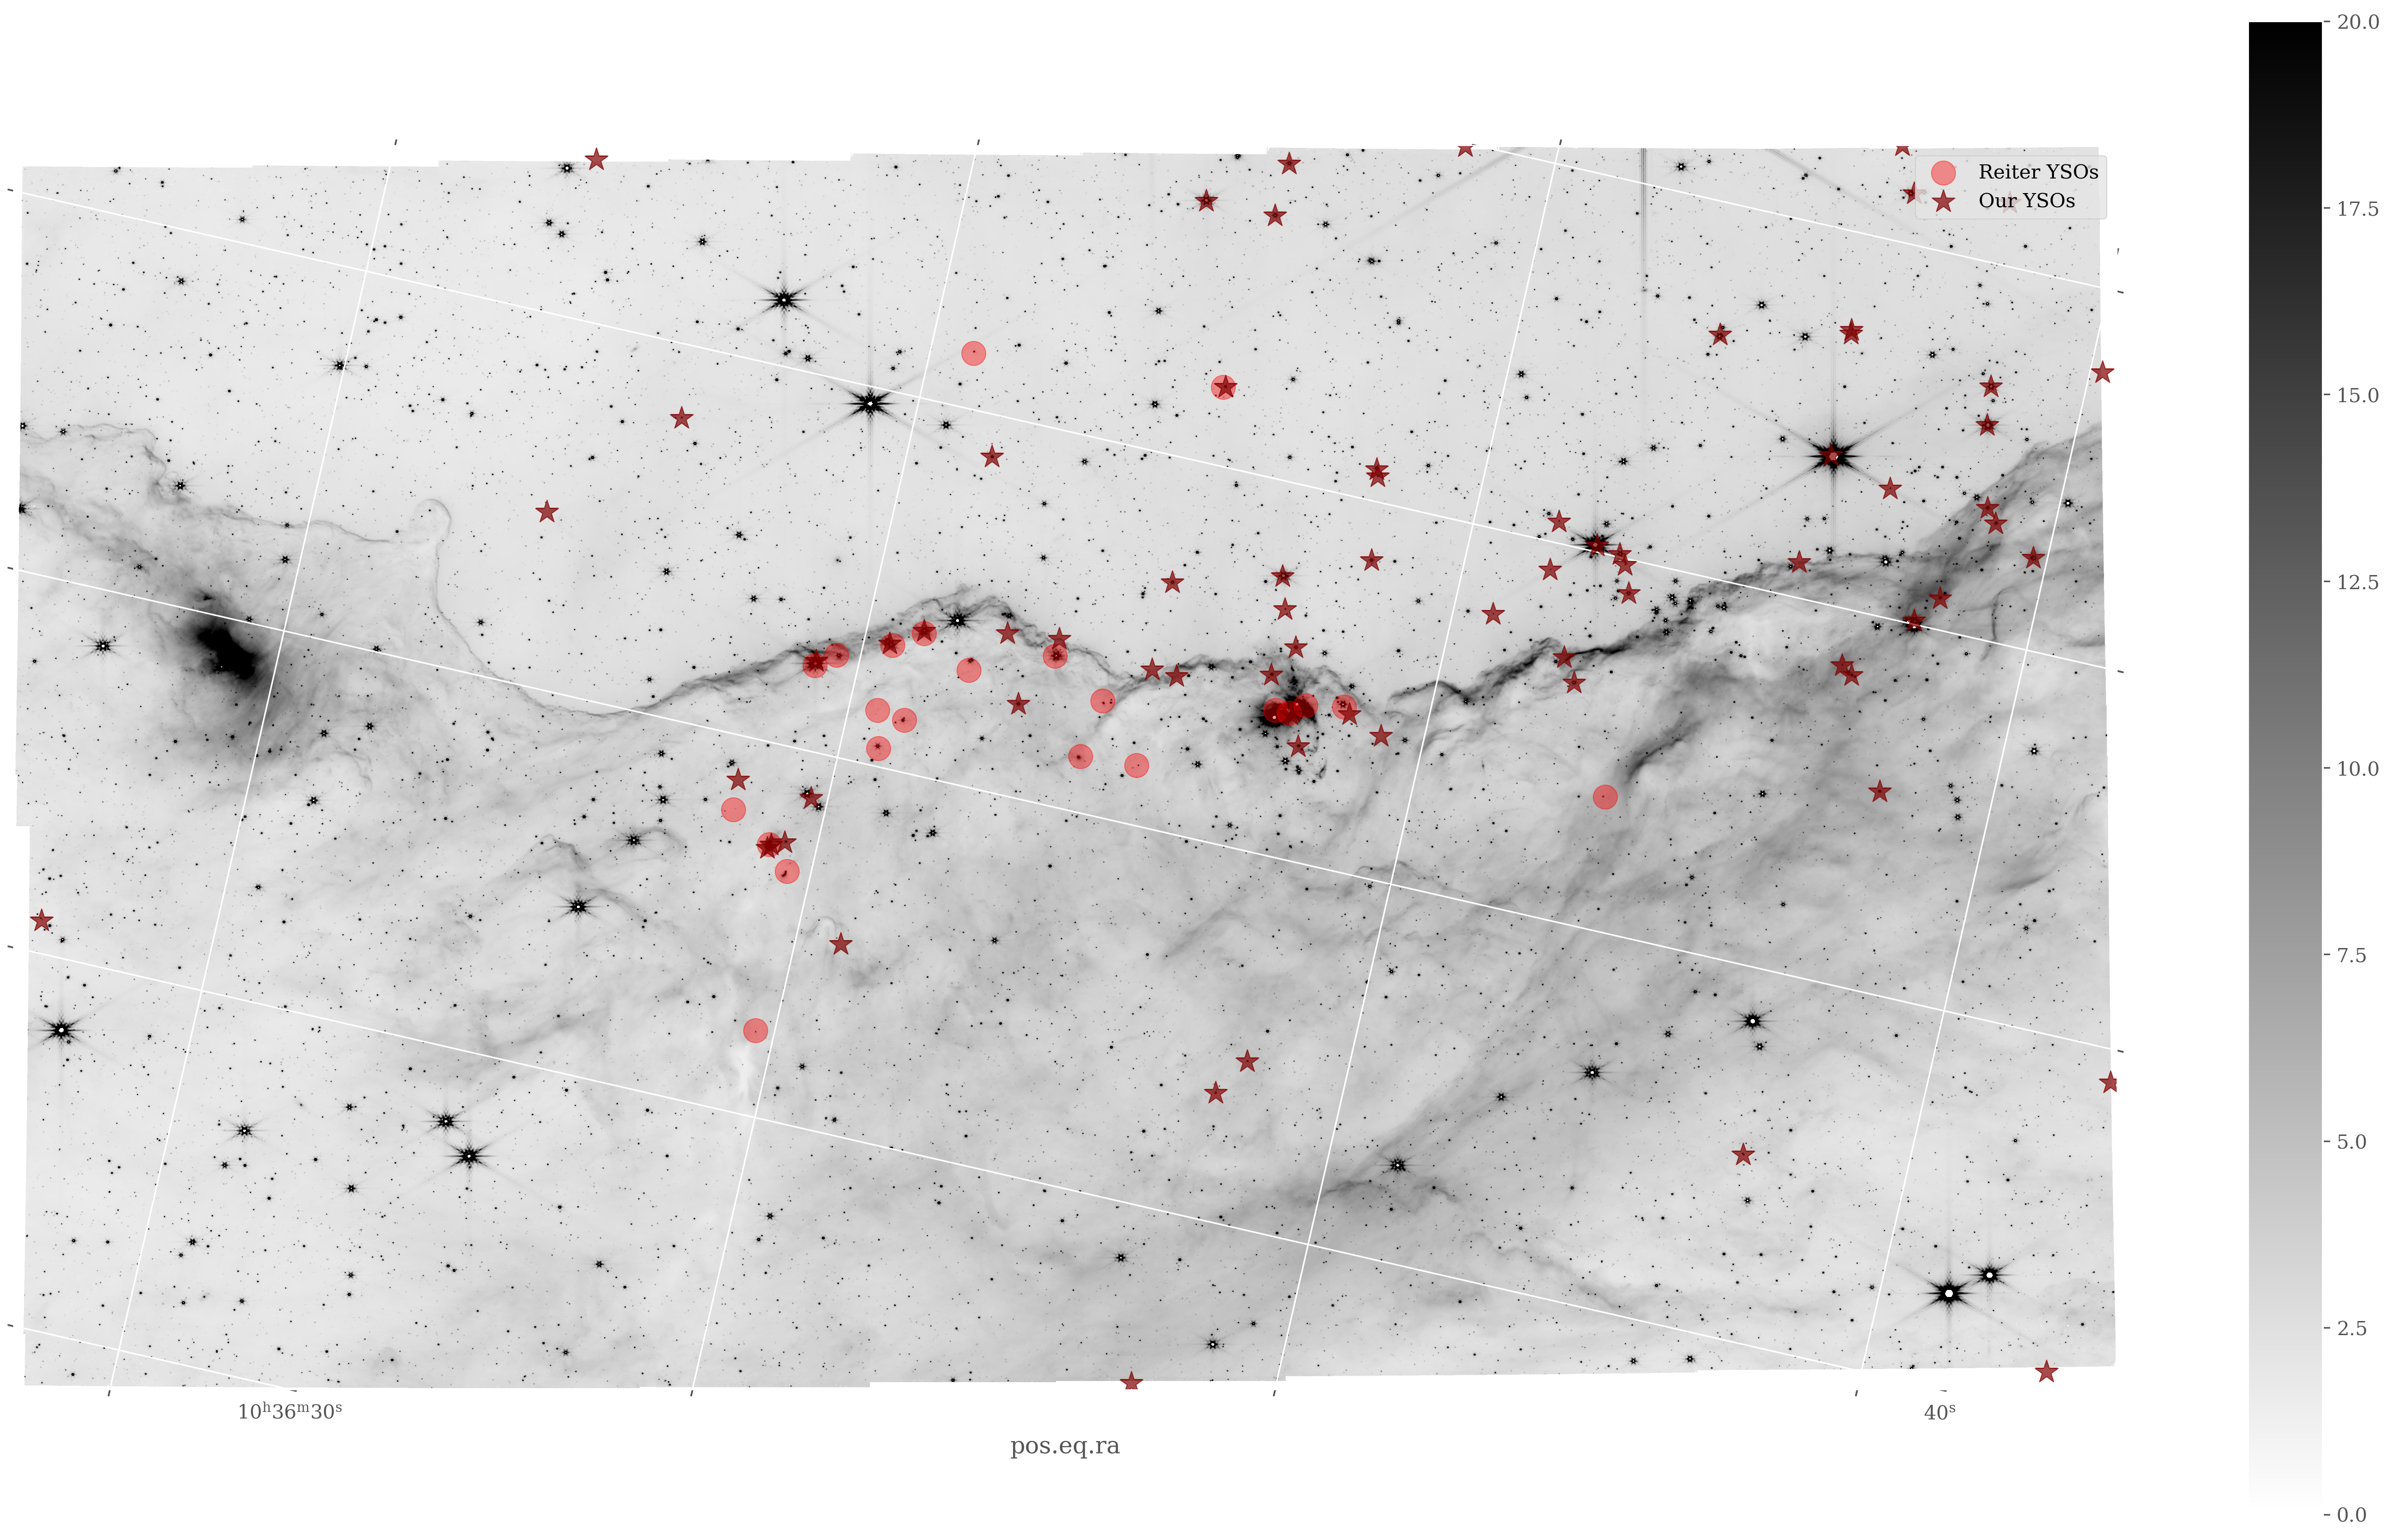

In [382]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u


# Plot image
filter = "f444w"
image_file = f"../../../ngc3324/FITS/JWST_{filter}.fits"


h = fits.getheader(image_file)
f = fits.open(image_file)
wcs = WCS(f[1].header)
# plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(24,14),dpi=300)
ax = plt.subplot(projection=wcs)
plt.grid(color='white', ls='solid')
plt.imshow(f[1].data,cmap='gray_r',vmin=0,vmax=20,origin='lower') #vmax =1500 for f1800w
ymax, ymin = ax.get_ylim()
xmax, xmin = ax.get_xlim()
plt.colorbar()





# ras, decs = wcs.wcs_pix2world(np.linspace(-500,15000,100), np.linspace(-500,16000,100), 1)
# print(min(ras))



reit = ["10:36:42.3 -58:38:04", "10:36:48.0 -58:38:19", "10:36:47.3 -58:38:10", "10:36:46.7 -58:38:05", "10:36:51.5 -58:37:54", "10:36:50.5 -58:37:52",\
    "10:36:51.4 -58:37:48", "10:36:53.8 -58:37:48", "10:36:51.5 -58:37:10", "10:36:54.2 -58:36:26", "10:36:54.4 -58:36:18", "10:36:54.0 -58:37:20",\
        "10:36:53.6 -58:35:20", "10:36:53.1 -58:37:37", "10:36:53.3 -58:37:54", "10:36:52.7 -58:38:05", "10:36:53.1 -58:37:08", "10:36:51.6 -58:36:58",\
        "10:36:52.3 -58:38:09", "10:36:53.9 -58:36:29", "10:37:01.5 -58:37:51", "10:37:02.1 -58:36:58", "10:36:53.9 -58:36:32"]# End of third row is the end of MHO-only sources
sky_1 = SkyCoord(reit,unit=(u.hourangle, u.deg))
ra_1 = sky_1.ra
dec_1 = sky_1.dec

reit_eg = ["10:36:53.7 -58:35:47", "10:36:59.5 -58:39:01", "10:37:07.2 -58:35:36", "10:36:55.2 -58:38:09"]
sky_1 = SkyCoord(reit_eg,unit=(u.hourangle, u.deg))
ra_eg = sky_1.ra
dec_eg = sky_1.dec


spicy = ["10:36:47.3 -58:38:10","10:36:54.0 -58:37:20","10:36:53.9 -58:36:29","10:37:02.1 -58:36:58","10:36:53.3 -58:37:54","10:36:52.3 -58:38:09"]
sky_1 = SkyCoord(spicy,unit=(u.hourangle, u.deg))
ra_spicy = sky_1.ra
dec_spicy = sky_1.dec


ra_yso = CC_Webb_Classified.RA.values[CC_Webb_Classified.Class == 0]
dec_yso = CC_Webb_Classified.DEC.values[CC_Webb_Classified.Class == 0]

plt.scatter(ra_1,dec_1, marker='o', c='red',s=150, alpha=0.4,transform=ax.get_transform('fk5'),label='Reiter YSOs')
plt.scatter(ra_yso,dec_yso, marker='*', c='maroon',s=150, alpha=0.7,transform=ax.get_transform('fk5'),label='Our YSOs')
ax.set_ylim(ymax, ymin)
ax.set_xlim(xmax, xmin)
plt.legend(loc=1)
plt.xticks()

plt.savefig(f"CC_w_Reiter_SPICYtr_Label_{filter}.png",dpi=300)


In [383]:
# from astropy.coordinates import match_coordinates_sky
# j_sky = SkyCoord(webb_only.RA*u.deg, webb_only.DEC*u.deg)
# s2_sky = SkyCoord(all_inp.RA*u.deg, all_inp.DEC*u.deg)
# spicy_cat = pd.read_csv('/Users/breannacrompvoets/Documents/Star_Formation/YSO+Classification/Archive/SPICY_YSO_SubClasses.csv',comment='#')

# sp_sky = SkyCoord(spicy_cat['     RAdeg      DEdeg'].to_numpy(),unit=u.deg)


# idx, sep2d, x = match_coordinates_sky(j_sky, s2_sky, nthneighbor=1, storekdtree='kdtree_sky')
# sep_constraint = sep2d < np.array(webb_only['size']*1)*u.deg

# print(np.count_nonzero(sep_constraint))

# j_matches = webb_only[sep_constraint]
# s2_matches = all_inp.iloc[idx[sep_constraint]]

# j_matches.reset_index(drop=True,inplace=True)
# s2_matches.reset_index(drop=True,inplace=True)

# jwst_spitz_cat = pd.concat([j_matches[['PRF_Preds']],s2_matches],axis=1)

In [384]:
# def deg_to_hrminsec(deg):
#     deg = deg
#     h = deg.to(u.hourangle)/u.hourangle
#     m = (h%1)*60
#     s = (m%1)*60
#     return str(int(h))+"{:02d}".format(int(m))+"{:04.1f}".format(s)
# def deghr_to_hrminsec(deg):
#     h = deg/u.deg
#     m = 60-(h%1)*60
#     s = (m%1)*60
#     return str(int(h))+"{:02d}".format(int(m))+"{:02d}".format(int(s))




# webb_ysos = webb_only[webb_only.PRF_Preds==0]
# j_sky = SkyCoord(webb_ysos.RA*u.deg, webb_ysos.DEC*u.deg)
# sky_reit = SkyCoord(reit,unit=(u.hourangle, u.deg))
# idx_r, sep2d_r, _ = match_coordinates_sky(j_sky, sky_reit, nthneighbor=1, storekdtree='kdtree_sky')
# j_reit_matches = webb_ysos[sep2d_r < np.array(webb_ysos['size']*2)*u.deg]
# print(len(j_reit_matches))
# print(len(sky_reit))

# reit = np.array(reit)
# reit_matches = reit[idx_r[sep2d_r < np.array(webb_ysos['size']*2)*u.deg]]
# print(np.sort([idx_r[sep2d_r < np.array(webb_ysos['size']*2)*u.deg]]))

# jwst_num = []
# for k in reit_matches:
#     r_reit, r_dec = k.split()
#     jwst_num.append('J'+r_reit+r_dec)

# print(jwst_num)


# idx_sp, sep2d_sp, _ = match_coordinates_sky(j_sky, sp_sky, nthneighbor=1, storekdtree='kdtree_sky')
# j_spicy_matches = webb_ysos[sep2d_sp < np.array(webb_ysos['size']*2)*u.deg]
# print(len(j_spicy_matches))
# print(len(sp_sky))


# print(np.unique([idx_sp[sep2d_sp < np.array(webb_ysos['size']*2)*u.deg]]))
# jwst_num = []
# for k in sp_sky[idx_sp[sep2d_sp < np.array(webb_ysos['size']*2)*u.deg]]:
#     ra_s, dec_s = k.ra, k.dec
#     jwst_num.append('J'+deg_to_hrminsec(ra_s)+deghr_to_hrminsec(dec_s))

# print(jwst_num)


In [385]:
# [idx_sp[sep2d_sp < np.array(webb_ysos['size']*2)*u.deg]]

In [386]:
a = CC_Webb_Classified[CC_Webb_Classified.Class==0][CC_Webb_Classified['SPICY_Class_0/1']==0].index # Correctly classified as YSO
b = CC_Webb_Classified[CC_Webb_Classified.Class==0][CC_Webb_Classified['SPICY_Class_0/1']==1].index # Incorrectly classified as YSO
c = CC_Webb_Classified[CC_Webb_Classified.Class!=0][CC_Webb_Classified['SPICY_Class_0/1']==0].index # Incorrectly classified as Star
d = CC_Webb_Classified[CC_Webb_Classified.Class!=0][CC_Webb_Classified['SPICY_Class_0/1']==1].index # Correctly classified as Star


/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_94192/3283703603.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = CC_Webb_Classified[CC_Webb_Classified.Class==0][CC_Webb_Classified['SPICY_Class_0/1']==0].index # Correctly classified as YSO
/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_94192/3283703603.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b = CC_Webb_Classified[CC_Webb_Classified.Class==0][CC_Webb_Classified['SPICY_Class_0/1']==1].index # Incorrectly classified as YSO
/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_94192/3283703603.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = CC_Webb_Classified[CC_Webb_Classified.Class!=0][CC_Webb_Classified['SPICY_Class_0/1']==0].index # Incorrectly classified as Star
/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_94192/3283703603.py:4: UserWarning: Boolean Series key will be rei

In [387]:
mu_a = pd.DataFrame([CC_Webb_Classified.iloc[a].mean(skipna=True)])
sig_a = pd.DataFrame([CC_Webb_Classified.iloc[a].std(skipna=True)])

mu_b = CC_Webb_Classified.iloc[b].mean()
sig_b = CC_Webb_Classified.iloc[b].std()

mu_c = CC_Webb_Classified.iloc[c].mean()
sig_c = CC_Webb_Classified.iloc[c].std()

mu_d = CC_Webb_Classified.iloc[d].mean()
sig_d = CC_Webb_Classified.iloc[d].std()
# print(mu_a)
def sed_plot_mu(ax, ind, cat,title=None):
    mu = pd.DataFrame([cat.iloc[ind].mean(skipna=True)])
    sig = pd.DataFrame([cat.iloc[ind].std(skipna=True)])
    correction = -0.6
    # chi2 = chisquare((cat.iloc[ind]+correction).to_numpy()[~np.isnan(cat.iloc[ind]+correction).to_numpy()],np.array(mu)[~np.isnan(np.array(mu))])
    # fig, ax = plt.subplots(figsize=(12,6),dpi=100)
    plt.rcParams['font.size'] = 12
    plt.rcParams['font.family'] = 'serif'
    plt.style.use('ggplot')
    plt.gca().invert_yaxis()

    kwargs = {
        'marker': 'o',
        # 'linestyle': '-.',
        'alpha': 0.2
    }

    webb_bands = [idx for idx in mu_a.columns.values if (idx[:14].lower() == 'isophotal_vega' and (idx[-9:-6] != 'err' and idx[-15:-12] != 'err'and idx[-10:-7] != 'err'))]
    webb_mic = [int(webb_bands[i].split('f')[-1][:-1])/100 for i in np.arange(0,len(webb_bands))]

    spitz2m_bands = [idx for idx in mu_a.columns.values if (idx[:3].lower() == 'mag')]
    spitz_mic = [1.235,1.662,2.159,3.6,4.5,5.8,8.0]
    maxes = cat[spitz2m_bands].max().to_numpy()

    all_mic = list(np.r_[webb_mic,spitz_mic]) # Collect list of values for xticks
    del all_mic[4] 
    del all_mic[2]
    del all_mic[1]# Delete the xtick label of 4.44 to avoid over crowding

    ax.plot(np.array([webb_mic]*len(cat.iloc[ind])).transpose(),(cat.iloc[ind][webb_bands].to_numpy()+correction).transpose(),'--',c='r',alpha=0.7)
    ax.plot(webb_mic,mu[webb_bands].to_numpy()[0]+correction,**kwargs,c='r',label='Webb SED')
    ax.fill_between(webb_mic,mu[webb_bands].to_numpy()[0]+correction-sig[webb_bands].to_numpy()[0],mu[webb_bands].to_numpy()[0]+correction+sig[webb_bands].to_numpy()[0],color='r',alpha=0.1)
    ax.plot(np.array([spitz_mic]*len(cat.iloc[ind])).transpose(),(cat.iloc[ind][spitz2m_bands].to_numpy()+correction).transpose(),'--',c='b',alpha=0.5)
    ax.plot(spitz_mic,mu[spitz2m_bands].to_numpy()[0],**kwargs, c='b',label='Spitzer/2MASS SED')
    ax.fill_between(spitz_mic,mu[spitz2m_bands].to_numpy()[0]-sig[spitz2m_bands].to_numpy()[0],mu[spitz2m_bands].to_numpy()[0]+sig[spitz2m_bands].to_numpy()[0],color='b',alpha=0.1)
    ax.plot([],[],alpha=0,label=f'Number: {len(ind)}')
    # ax.plot(spitz_mic,maxes,marker='x',c='b',markersize=10,label='Noise Values')
    # ax.set_xticks(all_mic)
    # plt.plot(label=f'$\chi$ Squared: {chi2}')
    # plt.legend(facecolor='darkgrey', framealpha=1,loc='lower right')
    # plt.xticks(all_mic)
    # plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
    # ax.set_xlabel('Wavelength')
    # ax.set_ylabel('Magnitude (Vega)')
    ax.set_title(title,c='k')

    return ax


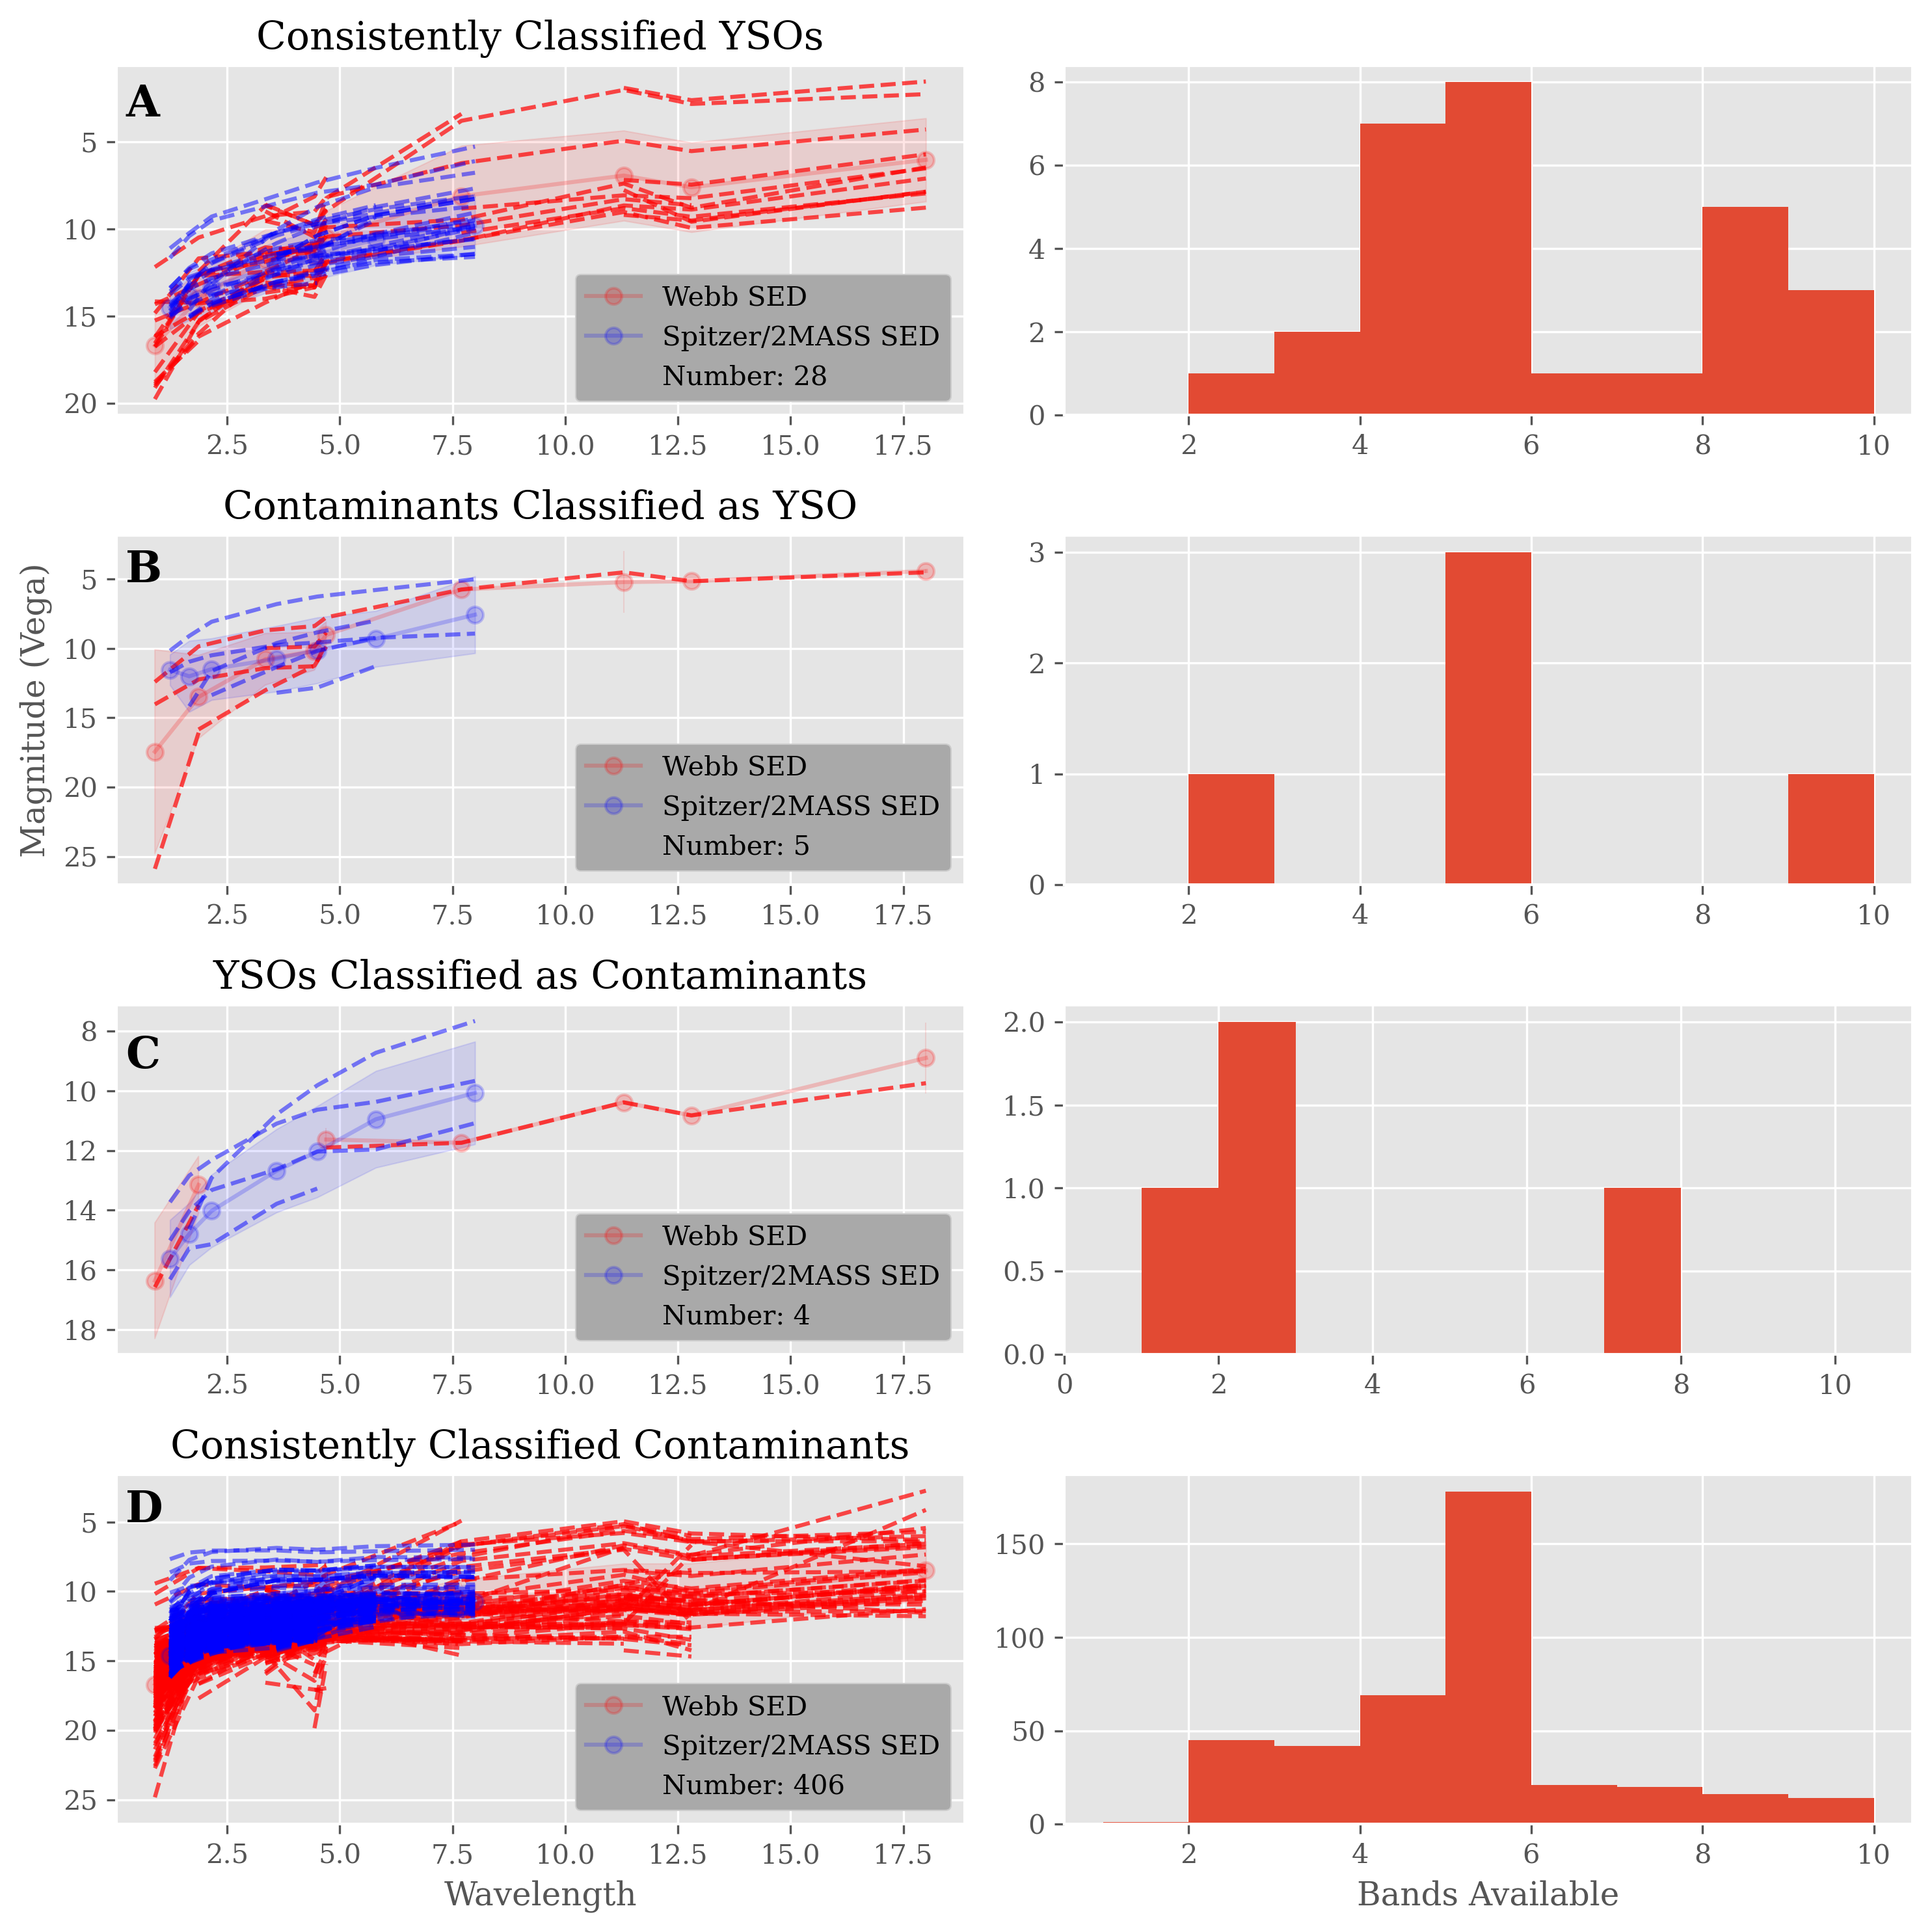

In [388]:

fig, axs = plt.subplots(4,2,figsize=(10,10),dpi=300)

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'serif'
plt.style.use('ggplot')
plt.tight_layout()
fig.set_tight_layout(True)
# subfigs = fig.subfigures(1, 2)

axs[0][0].invert_yaxis()
axs[1][0].invert_yaxis()
axs[2][0].invert_yaxis()
axs[3][0].invert_yaxis()
# axs[3][1].invert_yaxis()
axs[0][0] = sed_plot_mu(axs[0][0],a,CC_Webb_Classified,title='Consistently Classified YSOs')
axs[1][0] = sed_plot_mu(axs[1][0],b,CC_Webb_Classified,title='Contaminants Classified as YSO')
axs[2][0] = sed_plot_mu(axs[2][0],c,CC_Webb_Classified,title='YSOs Classified as Contaminants')
axs[3][0] = sed_plot_mu(axs[3][0],d,CC_Webb_Classified,title='Consistently Classified Contaminants')

ylim_a = axs[0][0].get_ylim()[1]
ylim_b = axs[1][0].get_ylim()[1]
ylim_c = axs[2][0].get_ylim()[1]
ylim_d = axs[3][0].get_ylim()[1]
axs[0][0].text(0.25, ylim_a+1, 'A',  fontsize=16, fontweight='bold', va='top',c='k')
axs[1][0].text(0.25, ylim_b+1, 'B',  fontsize=16, fontweight='bold', va='top',c='k')
axs[2][0].text(0.25, ylim_c+1, 'C',  fontsize=16, fontweight='bold', va='top',c='k')
axs[3][0].text(0.25, ylim_d+1, 'D',  fontsize=16, fontweight='bold', va='top',c='k')


axs[0][0].legend(facecolor='darkgrey', framealpha=1,loc='lower right')
axs[1][0].legend(facecolor='darkgrey', framealpha=1,loc='lower right')
axs[2][0].legend(facecolor='darkgrey', framealpha=1,loc='lower right')
axs[3][0].legend(facecolor='darkgrey', framealpha=1,loc='lower right')
plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
axs[3][0].set_xlabel('Wavelength')
axs[1][0].set_ylabel('Magnitude (Vega)')


axs[0][1].hist([np.count_nonzero(~CC_Webb_Classified[webb_bands].iloc[i].isna()) for i in a],bins=np.arange(1,11,1))
axs[1][1].hist([np.count_nonzero(~CC_Webb_Classified[webb_bands].iloc[i].isna()) for i in b],bins=np.arange(1,11,1))
axs[2][1].hist([np.count_nonzero(~CC_Webb_Classified[webb_bands].iloc[i].isna()) for i in c],bins=np.arange(1,11,1))
axs[3][1].hist([np.count_nonzero(~CC_Webb_Classified[webb_bands].iloc[i].isna()) for i in d],bins=np.arange(1,11,1))
axs[2][1].set_xlim(0,11)
axs[3][1].set_xlabel('Bands Available')

plt.savefig('seds.png',dpi=300)

-0.7560663342039867


(array([  2.,   0.,   1.,   1.,   3.,  98., 207.,  32.,   3.,   1.]),
 array([-7.71392267, -6.6082671 , -5.50261154, -4.39695597, -3.2913004 ,
        -2.18564484, -1.07998927,  0.02566629,  1.13132186,  2.23697742,
         3.34263299]),
 <BarContainer object of 10 artists>)

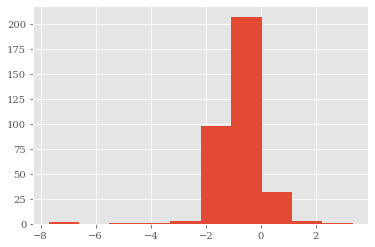

In [406]:
diffs = all_inp.mag_IR2-all_inp.isophotal_vegamag_f444w
print(np.nanmean(diffs))
plt.hist(diffs)

## Notes

kld - divergence metric

Keep 4.5-4.44

Don't forget mags are logarithmic, look at Jy 2.5log(J1/J2)